# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="
    
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")


# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city- need to request "metric" to retrieve C values.
    city_url = url + city + "&appid=" + weather_api_key + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | isafjordur
Processing Record 2 of Set 1 | zavety il'icha
Processing Record 3 of Set 1 | san antonio de pale
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | lompoc
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | barcelos
Processing Record 10 of Set 1 | ocos
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | terme
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | ciudad lazaro cardenas
Processing Record 19 of Set 1 | chonchi
Processing Record 20 of Set 1 | college
Processing Record 21 of Set 1 | ust-nera
Processing Record 22 of Set 1 | grytviken
Processing Re

Processing Record 36 of Set 4 | lata
Processing Record 37 of Set 4 | porto novo
Processing Record 38 of Set 4 | nangwa
Processing Record 39 of Set 4 | ardabil
Processing Record 40 of Set 4 | cukai
Processing Record 41 of Set 4 | as sulayyil
Processing Record 42 of Set 4 | hermanus
Processing Record 43 of Set 4 | sarakhs
Processing Record 44 of Set 4 | yulinshi
Processing Record 45 of Set 4 | cova figueira
Processing Record 46 of Set 4 | asekeyevo
Processing Record 47 of Set 4 | utrik
Processing Record 48 of Set 4 | nogliki
Processing Record 49 of Set 4 | tolanaro
Processing Record 0 of Set 5 | masterton
Processing Record 1 of Set 5 | argostolion
Processing Record 2 of Set 5 | dongning
Processing Record 3 of Set 5 | stenungsund
Processing Record 4 of Set 5 | novaya igirma
Processing Record 5 of Set 5 | vilyuchinsk
Processing Record 6 of Set 5 | kinango
Processing Record 7 of Set 5 | rio grande
Processing Record 8 of Set 5 | bandar abbas
Processing Record 9 of Set 5 | hithadhoo
Processin

Processing Record 28 of Set 8 | isle of lewis
City not found. Skipping...
Processing Record 29 of Set 8 | apolinario saravia
Processing Record 30 of Set 8 | timimoun
Processing Record 31 of Set 8 | stjordalshalsen
Processing Record 32 of Set 8 | smolyan
Processing Record 33 of Set 8 | malabar
Processing Record 34 of Set 8 | nadym
Processing Record 35 of Set 8 | janakpur
Processing Record 36 of Set 8 | kirchhain
Processing Record 37 of Set 8 | cartagena
Processing Record 38 of Set 8 | itoman
Processing Record 39 of Set 8 | lethem
Processing Record 40 of Set 8 | nar'yan-mar
Processing Record 41 of Set 8 | padang
Processing Record 42 of Set 8 | grand falls-windsor
Processing Record 43 of Set 8 | cururupu
Processing Record 44 of Set 8 | nouadhibou
Processing Record 45 of Set 8 | adelia maria
Processing Record 46 of Set 8 | nemuro
Processing Record 47 of Set 8 | nuuk
Processing Record 48 of Set 8 | elliot lake
Processing Record 49 of Set 8 | tambo
Processing Record 0 of Set 9 | plettenberg 

Processing Record 18 of Set 12 | spring creek
Processing Record 19 of Set 12 | kapoeta
Processing Record 20 of Set 12 | zanesville
Processing Record 21 of Set 12 | grand gaube
Processing Record 22 of Set 12 | oral
Processing Record 23 of Set 12 | gizo
Processing Record 24 of Set 12 | bargaal
Processing Record 25 of Set 12 | vazante
Processing Record 26 of Set 12 | dali
Processing Record 27 of Set 12 | pelabuhanratu
Processing Record 28 of Set 12 | takoradi
Processing Record 29 of Set 12 | sault ste. marie
Processing Record 30 of Set 12 | paracuru
Processing Record 31 of Set 12 | sandnessjoen
Processing Record 32 of Set 12 | tindouf
Processing Record 33 of Set 12 | pingliang
Processing Record 34 of Set 12 | tralee
Processing Record 35 of Set 12 | vilcun
Processing Record 36 of Set 12 | lodwar
Processing Record 37 of Set 12 | sirte
Processing Record 38 of Set 12 | saint-denis
Processing Record 39 of Set 12 | severo-yeniseyskiy
Processing Record 40 of Set 12 | mahina
Processing Record 41 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,isafjordur,66.0755,-23.1240,6.00,93,100,0.73,IS,1683750021
1,zavety il'icha,49.0294,140.2494,0.76,82,64,1.36,RU,1683750107
2,san antonio de pale,-1.4014,5.6325,27.68,78,100,4.41,GQ,1683750107
3,avarua,-21.2078,-159.7750,26.03,78,75,6.17,CK,1683750107
4,lompoc,34.6391,-120.4579,23.90,64,0,8.94,US,1683750107


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,isafjordur,66.0755,-23.1240,6.00,93,100,0.73,IS,1683750021
1,zavety il'icha,49.0294,140.2494,0.76,82,64,1.36,RU,1683750107
2,san antonio de pale,-1.4014,5.6325,27.68,78,100,4.41,GQ,1683750107
3,avarua,-21.2078,-159.7750,26.03,78,75,6.17,CK,1683750107
4,lompoc,34.6391,-120.4579,23.90,64,0,8.94,US,1683750107


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

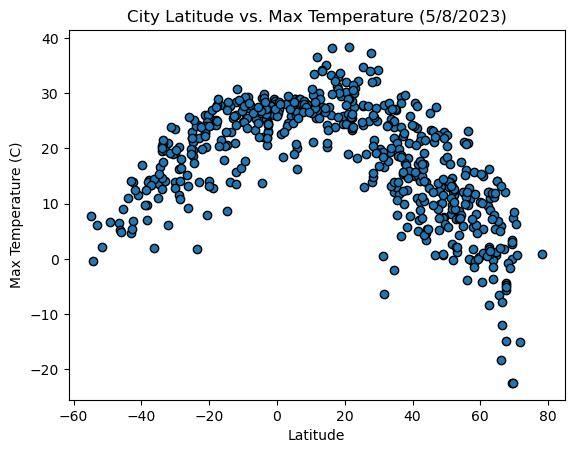

In [8]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
temp = city_data_df["Max Temp"]
plt.scatter(lat, temp, edgecolor ='black')

# # Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (5/8/2023)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# # Save the figure
plt.savefig("output_data/Fig1.png")

# # Show plot
plt.show()



#### Latitude Vs. Humidity

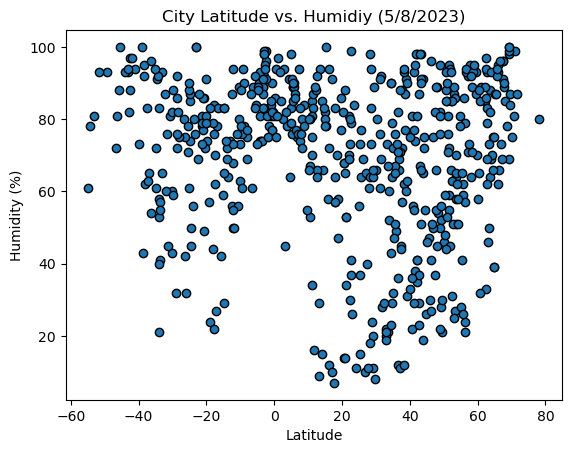

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
lat = city_data_df["Lat"]
temp = city_data_df["Humidity"]
plt.scatter(lat, temp, edgecolor ='black')

# # Incorporate the other graph properties
plt.title("City Latitude vs. Humidiy (5/8/2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

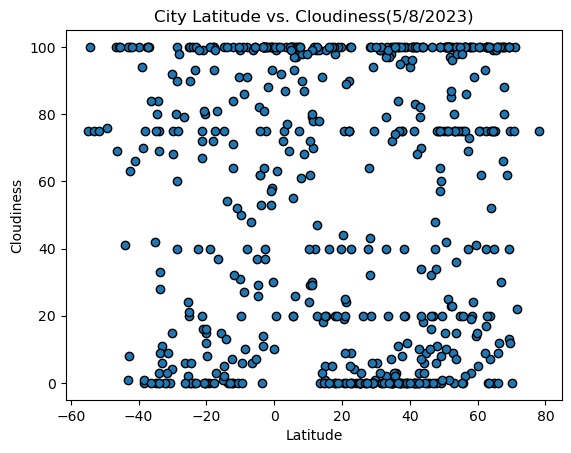

In [10]:
#Latitude vs. Cloudiness
lat = city_data_df["Lat"]
temp = city_data_df["Cloudiness"]
plt.scatter(lat, temp, edgecolor ='black')

# # Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness(5/8/2023)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

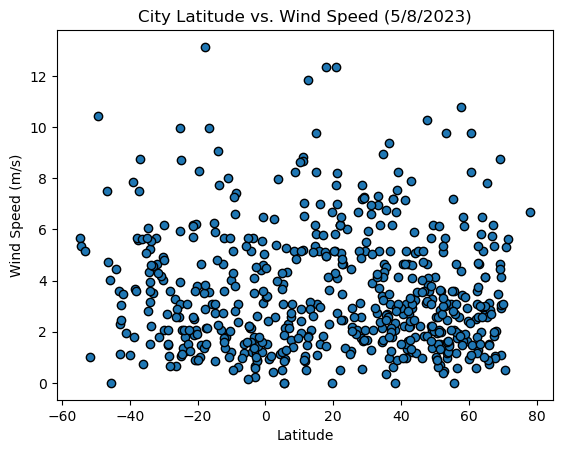

In [11]:
# Build the scatter plots for latitude vs. wind speed
lat = city_data_df["Lat"]
temp = city_data_df["Wind Speed"]
plt.scatter(lat, temp, edgecolor ='black')

# # Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (5/8/2023)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# Requires input of x_values and y_values as well as annotation location 
#(may need adjusted when data is rerun if data points obscure text)

def linear_regression(x_values, y_values, x_annotate, y_annotate):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    text = plt.annotate(line_eq,(x_annotate, y_annotate),fontsize=15,color="red")
    print(f'The r-value is {rvalue}')
    return

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,isafjordur,66.0755,-23.1240,6.00,93,100,0.73,IS,1683750021
1,zavety il'icha,49.0294,140.2494,0.76,82,64,1.36,RU,1683750107
4,lompoc,34.6391,-120.4579,23.90,64,0,8.94,US,1683750107
5,ilulissat,69.2167,-51.1000,0.01,69,40,8.75,GL,1683750107
8,barcelos,41.5388,-8.6151,17.14,74,83,5.14,PT,1683750108


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,san antonio de pale,-1.4014,5.6325,27.68,78,100,4.41,GQ,1683750107
3,avarua,-21.2078,-159.7750,26.03,78,75,6.17,CK,1683750107
6,port-aux-francais,-49.3500,70.2167,6.67,93,76,10.43,TF,1683750107
7,blackmans bay,-43.0167,147.3167,4.74,93,1,2.30,AU,1683750108
11,waitangi,-43.9535,-176.5597,11.01,93,41,4.47,NZ,1683750108


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.7822139652442807


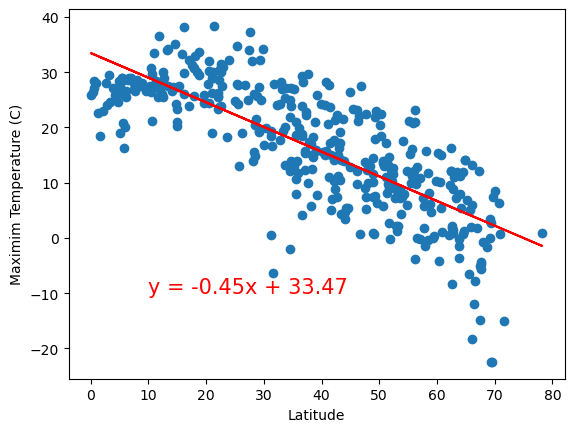

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
x_annotate = 10
y_annotate = -10


linear_regression(x_values, y_values, x_annotate, y_annotate)
plt.xlabel('Latitude')
plt.ylabel('Maximim Temperature (C)')


plt.show()

The r-value is 0.7734531087654696


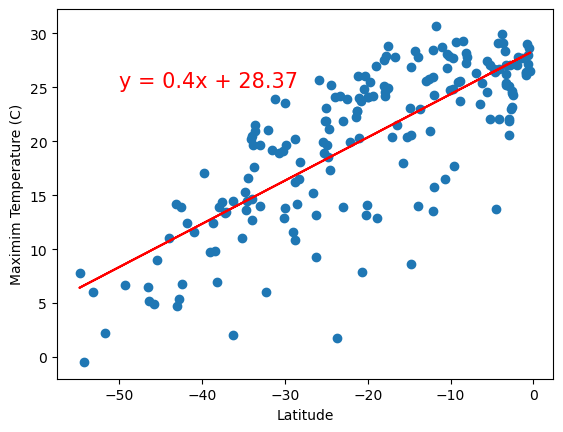

In [23]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
x_annotate = -50
y_annotate = 25


linear_regression(x_values, y_values, x_annotate, y_annotate)
plt.xlabel('Latitude')
plt.ylabel('Maximim Temperature (C)')
plt.show()

**Discussion about the linear relationship:** There is a clear correlation between temperature and proximity to the equator. In the chart describing the Northern Hemisphere, temperature decreases as distance from the equator and in the Southern Hemisphere, temperature increases as distance to the equator decreases. The high r-values of both plots suggest a strong correlation between latitude and temperature.


### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.059054824165140685


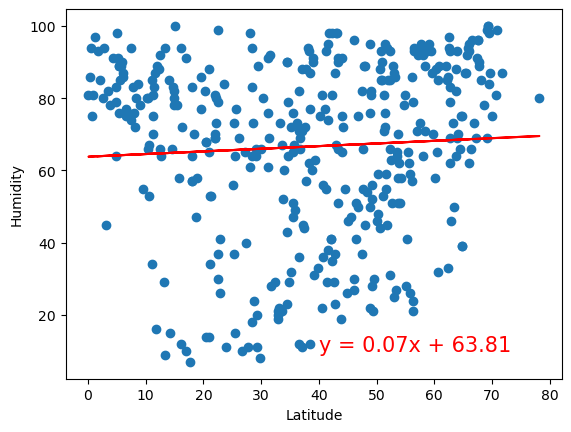

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
x_annotate = 40
y_annotate = 10


linear_regression(x_values, y_values, x_annotate, y_annotate)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r-value is 0.09777740412075742


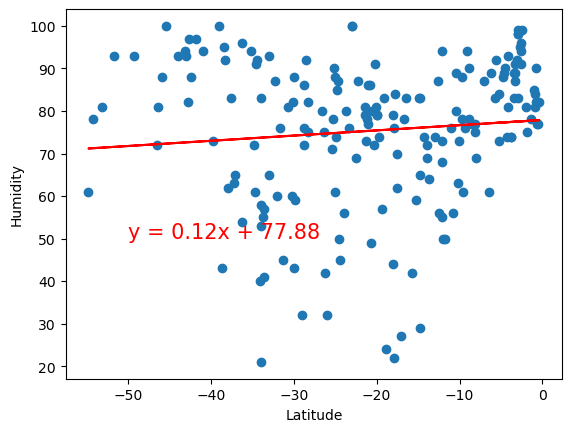

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
x_annotate = -50
y_annotate = 50

linear_regression(x_values, y_values, x_annotate, y_annotate)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** The r-values of both the Northern and Southern Hemisphere are low, suggesting that there is not a strong relationship between humidity and latitude. Furthermore, since both charts display a positive correlation, they do not trend towards each other at the equator, but rather humidity increases slightly in the Norther Hemisphere as distance from the equator increases and humidity decreases as distance from the equator increases in the Southern Hemisphere. This could point to larger seasonal trends, so it would be useful to look at data from at least a year before drawing any conclusions regarding humidity vs. latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.022601704924274865


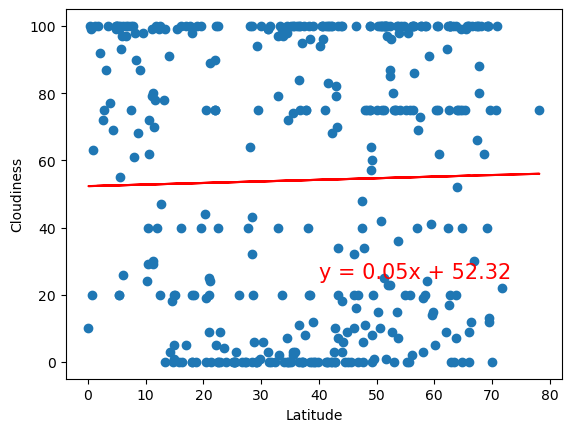

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
x_annotate = 40
y_annotate = 25


linear_regression(x_values, y_values, x_annotate, y_annotate)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-value is 0.041233281221754826


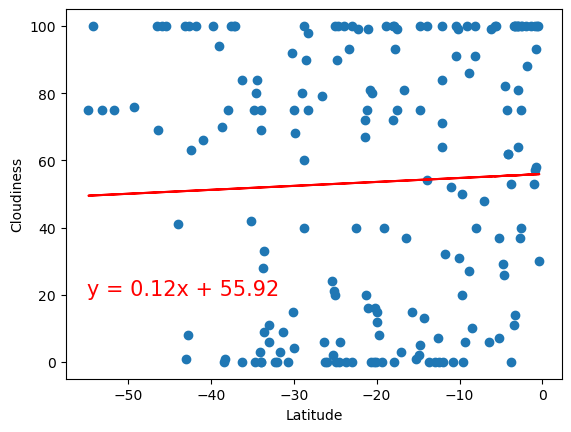

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
x_annotate = -55
y_annotate = 20

linear_regression(x_values, y_values, x_annotate, y_annotate)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** The plots of Latitude vs. Cloudiness are similar to those examining Humidity, with a low r-value for both, indicating a very weak connection between the variables. Also, as with humidity, both plots show a positive correlation, indicating that there is not a strong relationship between proximity to the equator and cloudiness, but that cloudiness increases (slightly) as one moves north. Again, this may be tied to larger seasonal weather trends.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.10354884873963396


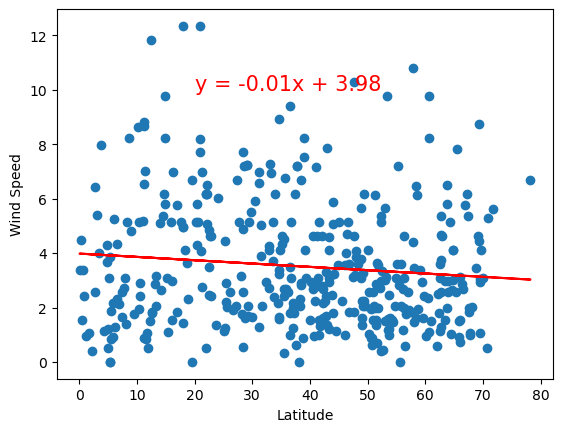

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
x_annotate = 20
y_annotate = 10


linear_regression(x_values, y_values, x_annotate, y_annotate)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r-value is -0.18833487496646342


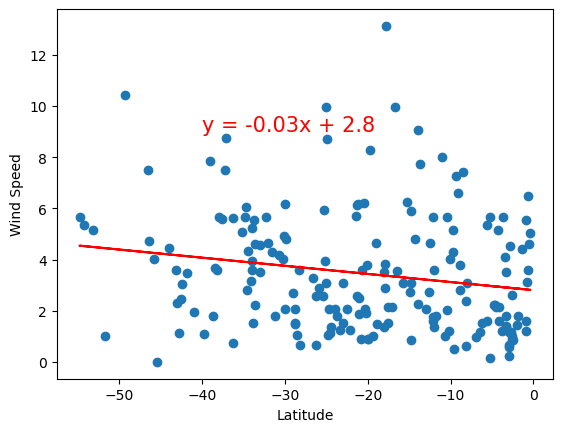

In [34]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
x_annotate = -40
y_annotate = 9

linear_regression(x_values, y_values, x_annotate, y_annotate)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** The 2 plots examining Wind Speed versus latitude have little in common. In the Norther Hemisphere, the r-value is almost 0, indicating that there is no relationship between the 2 variables. In the Southern Hemisphere, there is a small decrease in Wind Speed as distance to the equator decreases. With an r-value of .20, it is not enough of a relation to draw any conclusions from.

Overall, Temperature is the only one of the weather conditions examined that implies a strong relationship with Latitude. In both hemispheres, temperature increases as distance to the equator decreases.